In [32]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from FFNN import FFNN
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

from activation_funcs import sigmoid, RELU, LRELU
from functions import CostLogReg, CostLogReg_derivative
from Schedulers import Adam, Constant, Momentum, RMS_prop, Adagrad, AdagradMomentum

plt.style.use('seaborn-darkgrid')


C:\Users\Erik\AppData\Local\Temp\ipykernel_47136\1064970848.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [4]:
seed = 42069
np.random.seed(seed)

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # Reshape to match FFNN output shape

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Optimal model

In [ ]:
seed = 42
np.random.seed(seed)

# Define network architecture
input_size = X.shape[1]  # 30 features
hidden_layers = [15]  
output_size = 1  # Binary classification
dimensions = (input_size, *hidden_layers, output_size)

# Create model
model = FFNN(
	layer_sizes=dimensions,
	hidden_funcs=[sigmoid],  # Sigmoid activation for hidden layers
	output_func=sigmoid,  # Sigmoid for output layer since binary classification
	cost_func=CostLogReg,  # Logistic regression cost function
	cost_der=CostLogReg_derivative,  # Derivative of logistic regression cost function
	seed=seed,
)

# Training parameters
scheduler = Adam(eta=0.001, rho=0.9, rho2=0.999)
epochs = 500
batches = 20
lambda_value = 0.01

# Train model
scores = model.fit(
	X_train_scaled, 
	y_train,
	scheduler=scheduler,
	epochs=epochs,
	batches=batches,
	lmbda=lambda_value,
	X_test=X_test_scaled,
	y_test=y_test
)

cost_train = scores["cost"][-1]
cost_test = scores["test_cost"][-1]

train_accuracy = scores["train_accuracy"][-1]
test_accuracy = scores["test_accuracy"][-1]

print(f"\nFinal Training Cost: {cost_train:.4f}")
print(f"Final Test Cost: {cost_test:.4f}")
print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Classification task detected
Adam: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | training_scores: 0.228 | test_scores: 1.51 | train_acc: 0.993 | test_acc: 0.956  
Final Training Cost: 0.2277
Final Test Cost: 1.5149

Final Training Accuracy: 0.9934
Final Test Accuracy: 0.9561


# Hyperparameter space analysis

## Regularization vs learning rate

In [ ]:
seed = 42
np.random.seed(seed)

# Define network architecture
input_size = X.shape[1]  # 30 features
hidden_layers = [15]  
output_size = 1  # Binary classification
dimensions = (input_size, *hidden_layers, output_size)

# Create model
model = FFNN(
	layer_sizes=dimensions,
	hidden_funcs=[sigmoid],  # Sigmoid activation for hidden layers
	output_func=sigmoid,  # Sigmoid for output layer since binary classification
	cost_func=CostLogReg,  # Logistic regression cost function
	cost_der=CostLogReg_derivative,  # Derivative of logistic regression cost function
	seed=seed,
)

# Training parameters
epochs = 500
batches = 20

lambda_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
eta_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

train_accuracy = np.zeros([len(lambda_values), len(eta_values)])
test_accuracy = np.zeros([len(lambda_values), len(eta_values)])


for i, lambda_value in enumerate(lambda_values):
	for j, eta_value in enumerate(eta_values):
		model.reset_weights()
		scheduler = Adam(eta=eta_value, rho=0.9, rho2=0.999)
		# Train model
		scores = model.fit(
			X_train_scaled, 
			y_train,
			scheduler=scheduler,
			epochs=epochs,
			batches=batches,
			lmbda=lambda_value,
			X_test=X_test_scaled,
			y_test=y_test
		)

		train_accuracy[i][j] = scores["train_accuracy"][-1]
		test_accuracy[i][j] = scores["test_accuracy"][-1]

Classification task detected
Adam: Eta=1e-05, Lambda=1e-05
  [=======================================>] 100.0% | training_scores: 3.04 | test_scores: 3.33 | train_acc: 0.912 | test_acc: 0.904  Adam: Eta=0.0001, Lambda=1e-05
  [=======================================>] 100.0% | training_scores: 0.380 | test_scores: 0.606 | train_acc: 0.989 | test_acc: 0.982 Adam: Eta=0.001, Lambda=1e-05
  [=======================================>] 100.0% | training_scores: 0.000000000000000999 | test_scores: 1.82 | train_acc: 1.00 | test_acc: 0.947 Adam: Eta=0.01, Lambda=1e-05
  [=======================================>] 100.0% | training_scores: 0.000000000000000999 | test_scores: 1.51 | train_acc: 1.00 | test_acc: 0.956  Adam: Eta=0.1, Lambda=1e-05
  [===================>--------------------] 50.00% | training_scores: 0.228 | test_scores: 1.21 | train_acc: 0.993 | test_acc: 0.965   _acc: 0.965  

C:\Users\Erik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\autograd\numpy\numpy_vjps.py:52: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  [=======================================>] 100.0% | training_scores: 0.380 | test_scores: 2.12 | train_acc: 0.989 | test_acc: 0.939  Adam: Eta=1e-05, Lambda=0.0001
  [=======================================>] 100.0% | training_scores: 3.04 | test_scores: 3.33 | train_acc: 0.912 | test_acc: 0.904  Adam: Eta=0.0001, Lambda=0.0001
  [=======================================>] 100.0% | training_scores: 0.380 | test_scores: 0.606 | train_acc: 0.989 | test_acc: 0.982 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | training_scores: 0.000000000000000999 | test_scores: 1.51 | train_acc: 1.00 | test_acc: 0.956 Adam: Eta=0.01, Lambda=0.0001
  [=======================================>] 100.0% | training_scores: 0.000000000000000999 | test_scores: 1.51 | train_acc: 1.00 | test_acc: 0.956  Adam: Eta=0.1, Lambda=0.0001
  [=======================================>] 100.0% | training_scores: 0.607 | test_scores: 2.12 | train_acc: 0.982 | test_acc: 0.939  t_acc: 0.96

#TODO: Mark convergence

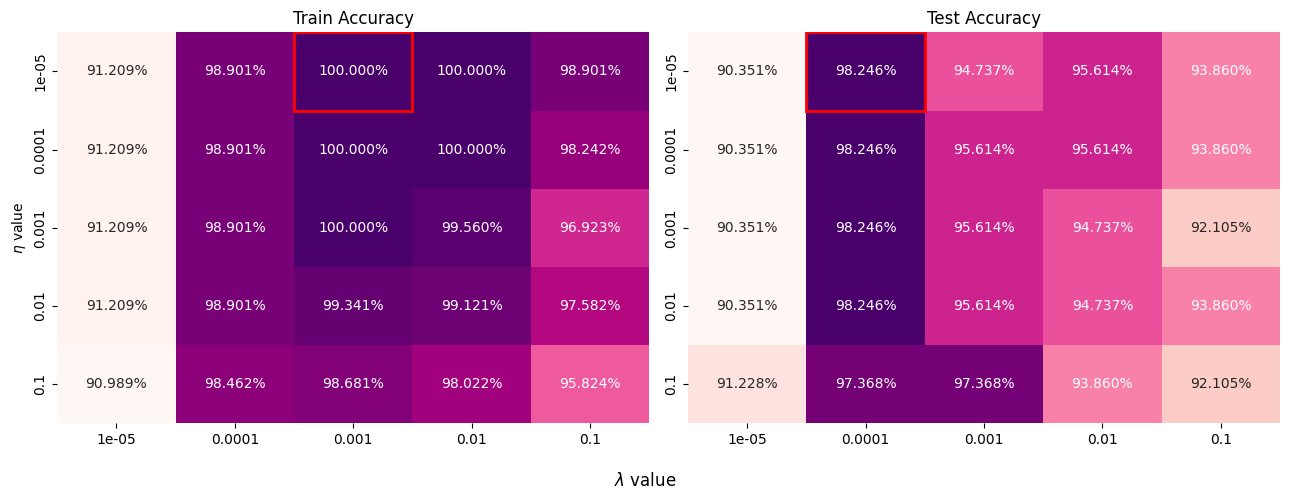

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Create masks for highlighting
mse_mask = np.zeros_like(train_accuracy, dtype=bool)
r2_mask = np.zeros_like(test_accuracy, dtype=bool)

# Set mask values using the optimal indices
mse_idx = np.unravel_index(np.argmax(train_accuracy), train_accuracy.shape)
r2_idx = np.unravel_index(np.argmax(test_accuracy), test_accuracy.shape)

# Plot MSE heatmap
sns.heatmap(train_accuracy, 
		cmap="RdPu",
		xticklabels=lambda_values,
		yticklabels=eta_values, 
		annot=True,
		ax=axs[0],
		fmt=".3%",
		cbar=False,
		)
axs[0].add_patch(plt.Rectangle((mse_idx[1], mse_idx[0]), 1, 1, fill=False, edgecolor='red', lw=2))

# Plot R2 heatmap  
sns.heatmap(test_accuracy,
		cmap="RdPu",
		xticklabels=lambda_values,
		yticklabels=eta_values, 
		annot=True,
				ax=axs[1],
		fmt=".3%",
		cbar=False,
		)

axs[1].add_patch(plt.Rectangle((r2_idx[1], r2_idx[0]), 1, 1, fill=False, edgecolor='red', lw=2))

# Customize titles and labels
axs[0].set_title("Train Accuracy")
axs[1].set_title("Test Accuracy")
axs[0].set_ylabel(r"$\eta$ value")
fig.supxlabel(r"$\lambda$ value")
plt.tight_layout()

plt.show()

## Hidden layers vs neurons

In [ ]:
seed = 42
np.random.seed(seed)

# Define network architecture
input_shape = X.shape[1]  # 30 features
hidden_nodes = [5, 10, 15, 20, 25]
hidden_layers = [1, 2, 3] 
output_shape = 1  # Binary classification

# Training parameters
epochs = 100
batches = 20

lambda_value = 1e-3
eta_value = 1e-3

train_accuracy = np.zeros([len(hidden_layers), len(hidden_nodes)])
test_accuracy = np.zeros([len(hidden_layers), len(hidden_nodes)])


for i, hidden_layer in enumerate(hidden_layers):
		for j, hidden_node in enumerate(hidden_nodes):
			hidden_shape = [hidden_node]*hidden_layer
			dims =  (input_shape, *hidden_shape, output_shape)

			model = FFNN(
						layer_sizes=dims,
						hidden_funcs=[sigmoid]*hidden_layer,
						output_func=sigmoid,
						cost_func=CostLogReg,
						seed=seed
					)

			scheduler = Adam(eta=eta_value, rho=0.9, rho2=0.999)
			# Train model
			scores = model.fit(
				X_train_scaled, 
				y_train,
				scheduler=scheduler,
				epochs=epochs,
				batches=batches,
				lmbda=lambda_value,
				X_test=X_test_scaled,
				y_test=y_test
			)

			train_accuracy[i][j] = scores["train_accuracy"][-1]
			test_accuracy[i][j] = scores["test_accuracy"][-1]

Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.531 | test_scores: 0.909 | train_acc: 0.985 | test_acc: 0.974 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.380 | test_scores: 1.21 | train_acc: 0.989 | test_acc: 0.965 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.304 | test_scores: 0.606 | train_acc: 0.991 | test_acc: 0.982 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.152 | test_scores: 1.51 | train_acc: 0.996 | test_acc: 0.956 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.228 | test_scores: 1.51 | train_acc: 0.993 | test_acc: 0.956 Classification task detected
Adam

## 

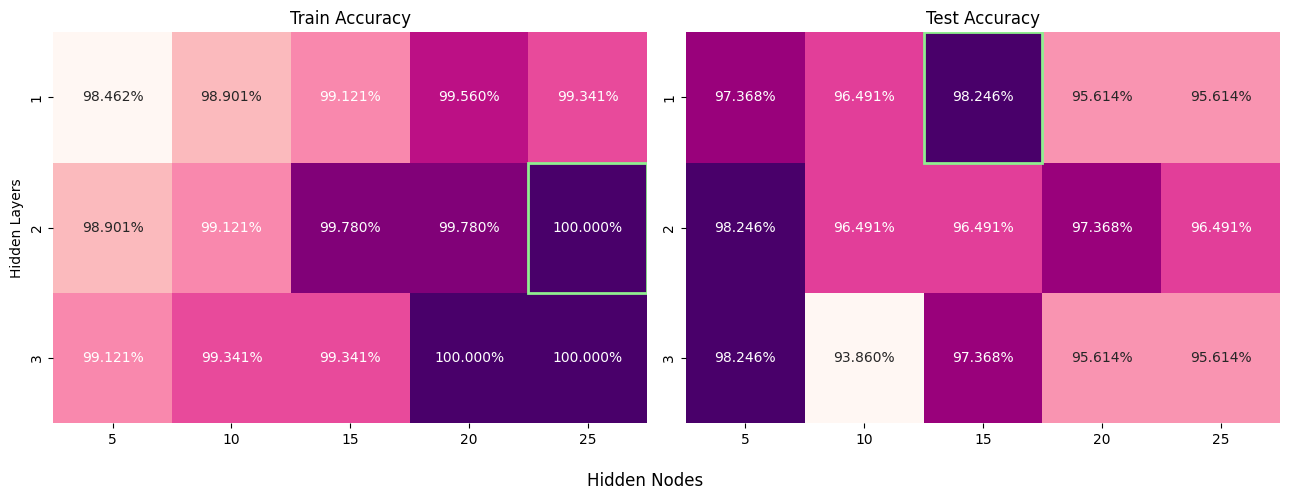

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Create masks for highlighting
mse_mask = np.zeros_like(train_accuracy, dtype=bool)
r2_mask = np.zeros_like(test_accuracy, dtype=bool)

# Set mask values using the optimal indices
mse_idx = np.unravel_index(np.argmax(train_accuracy), train_accuracy.shape)
r2_idx = np.unravel_index(np.argmax(test_accuracy), test_accuracy.shape)

# Plot MSE heatmap
sns.heatmap(train_accuracy, 
		cmap="RdPu",
		xticklabels=hidden_nodes,
		yticklabels=hidden_layers, 
		annot=True,
		ax=axs[0],
		fmt=".3%",
		cbar=False,
		)
axs[0].add_patch(plt.Rectangle((mse_idx[1], mse_idx[0]), 1, 1, fill=False, edgecolor='lightgreen', lw=2))

# Plot R2 heatmap  
sns.heatmap(test_accuracy,
		cmap="RdPu",
		xticklabels=hidden_nodes,
		yticklabels=hidden_layers, 
		annot=True,
				ax=axs[1],
		fmt=".3%",
		cbar=False,
		)

axs[1].add_patch(plt.Rectangle((r2_idx[1], r2_idx[0]), 1, 1, fill=False, edgecolor='lightgreen', lw=2))

# Customize titles and labels
axs[0].set_title("Train Accuracy")
axs[1].set_title("Test Accuracy")
axs[0].set_ylabel(r"Hidden Layers")
fig.supxlabel(r"Hidden Nodes")
plt.tight_layout()

plt.show()

#### Comments

- The high training accuracy and low validation accuracy suggest overfitting. This is likely due to the small dataset size. 

## Hidden layers vs neurons

In [ ]:
def test_architectures(data, hidden_sizes, activation_funcs, epochs, batches, scheduler, lmbda):
	"""
	Test different neural network architectures with varying activation functions.
	
	Parameters:
		Data: Tuple containing X, y, X_test, y_test
		hidden_sizes: List of integers specifying number of nodes in each hidden layer
		epochs: Number of training epochs
		batches: Batch size for training
		lmbda: Regularization parameter
	
	Returns:
		: Results for each architecture configuration
	"""
	X, target, X_test, target_test = data
	# Set up consistent training parameters
	input_size = X.shape[1]
	output_size = 1
	
	train_accuracy = list()
	test_accuracy = list()
	
	# Generate all possible combinations of activation functions
	for n_layers in range(1, len(hidden_sizes) + 1):
		current_hidden = hidden_sizes[:n_layers]
		func_combinations = list(product(activation_funcs, repeat=n_layers))
		
		for funcs in func_combinations:
			
			# Define network architecture
			dimensions = (input_size, *current_hidden, output_size)
			
			# Initialize and train model
			model = FFNN(
				layer_sizes=dimensions,
				hidden_funcs=funcs,
				output_func=sigmoid,
				cost_func=CostLogReg,
				cost_der=CostLogReg_derivative,
			)

			# Train model
			scores = model.fit(
				X, 
				target,
				scheduler=scheduler,
				epochs=epochs,
				batches=batches,
				lmbda=lmbda,
				X_test=X_test,
				y_test=target_test
			)
			
			train_accuracy.append(scores["train_accuracy"][-1])
			test_accuracy.append(scores["test_accuracy"][-1])
	return train_accuracy, test_accuracy

In [11]:
seed = 42
np.random.seed(seed)

data = (X_train_scaled, y_train, X_test_scaled, y_test)

# Define network architecture
input_shape = X.shape[1]  # 30 features
hidden_nodes = 15 
hidden_layers = [1, 2, 3] 
output_shape = 1  # Binary classification

activation_funcs = [sigmoid, RELU, LRELU]
activation_names = ['sigmoid', 'relu', 'leaky_relu']

# Training parameters
epochs = 100
batches = 20

lambda_value = 1e-3
eta_value = 1e-3

scheduler = Adam(eta=eta_value, rho=0.9, rho2=0.999)

train_accuracy, test_accuracy = test_architectures(data, hidden_layers, activation_funcs, epochs, batches, scheduler, lambda_value)



Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.455 | test_scores: 0.909 | train_acc: 0.987 | test_acc: 0.974 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.531 | test_scores: 1.21 | train_acc: 0.985 | test_acc: 0.965 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.987 | test_scores: 1.82 | train_acc: 0.971 | test_acc: 0.947 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 0.531 | test_scores: 1.51 | train_acc: 0.985 | test_acc: 0.956 Classification task detected
Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | training_scores: 1.14 | test_scores: 2.12 | train_acc: 0.967 | test_acc: 0.939  Classification task detected
Adam:

In [ ]:
def plot_architecture_results(train_acc, test_acc):
	"""
	Visualize training and test accuracies for different network architectures.
	
	Parameters:
		train_acc: List of final training accuracies for each architecture
		test_acc: List of final test accuracies for each architecture
	"""
	# Define activation function names and combinations
	act_names = ['sigmoid', 'ReLU', 'L_ReLU']
	n_funcs = len(act_names)
	n_layers = int(np.log(len(train_acc)) / np.log(n_funcs))  # Calculate number of layers from list length
	
	# Set up the figure
	fig, ax = plt.subplots(figsize=(15, 8))
	fig.suptitle('Training and Test Accuracies by Architecture')
	
	# Generate activation function combinations
	activation_combos = []
	for i in range(n_layers):
		combinations = list(product(act_names, repeat=i+1))
		for combo in combinations:
			activation_combos.append(' → '.join(act.upper() for act in combo))
	
	# Set width for bars
	bar_width = 0.35
	x = np.arange(len(train_acc))
	
	# Plot bars
	train_bars = ax.bar(x - bar_width/2, train_acc, bar_width, label='Training Accuracy')
	test_bars = ax.bar(x + bar_width/2, test_acc, bar_width, label='Test Accuracy')
	
	# Color the bars based on number of layers
	current_idx = 0
	for i in range(n_layers):
		n_combinations = n_funcs**(i+1)  # Number of combinations for current layer count
		colors = plt.cm.viridis(np.linspace(0, 1, n_combinations))
		for j in range(n_combinations):
			train_bars[current_idx + j].set_color(colors[j])
			test_bars[current_idx + j].set_color(colors[j])
			test_bars[current_idx + j].set_alpha(0.7)  # Make test bars slightly transparent
		current_idx += n_combinations
	
	# Customize plot
	ax.set_ylabel('Accuracy')
	ax.set_xticks(x)
	ax.set_xticklabels(activation_combos, rotation=45, ha='right')
	ax.legend()
	
	# Add vertical lines separating different numbers of layers
	cumsum = 0
	for i in range(n_layers-1):
		cumsum += n_funcs**(i+1)
		ax.axvline(x=cumsum-0.5, color='gray', linestyle='--', alpha=0.5)
	
	# Add text annotations for layer counts
	cumsum = 0
	for i in range(n_layers):
		n_combinations = n_funcs**(i+1)
		ax.text(cumsum + n_combinations/2 - 0.5, ax.get_ylim()[1], 
				f'{i+1} Layer{"s" if i>0 else ""}',
				ha='center', va='bottom')
		cumsum += n_combinations

	plt.ylim(0.5, 1)	
	plt.tight_layout()
	return fig


TabError: inconsistent use of tabs and spaces in indentation (3792041416.py, line 65)

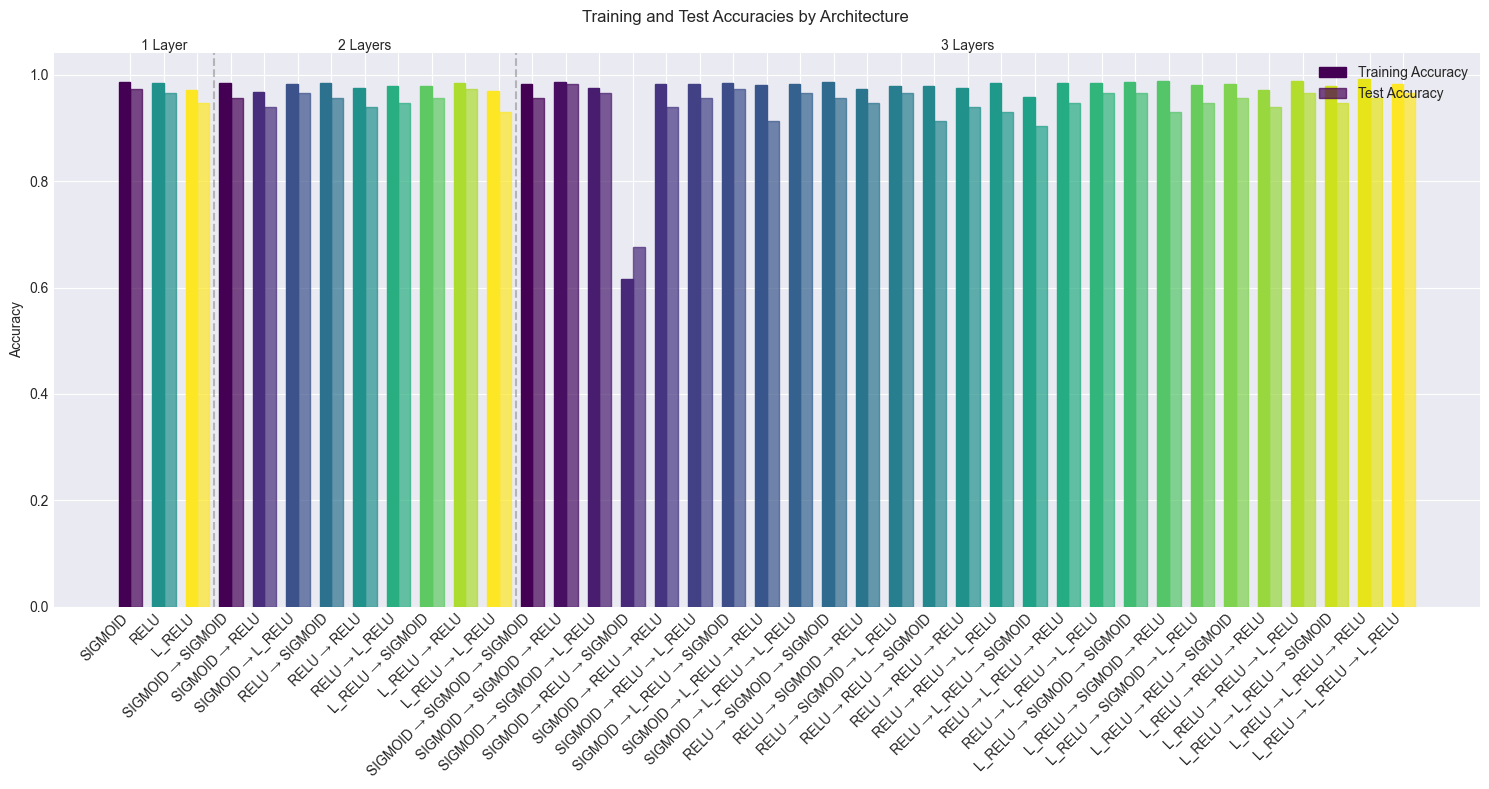

In [53]:
fig = plot_architecture_results(train_accuracy, test_accuracy)
plt.show()